<a href="https://colab.research.google.com/github/angelmetanosaa/DTI-Classification-Bank-Marketing/blob/main/DTI_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PENGENALAN DATASET**
Data adalah kumpulan data bank pemasaran klasik yang diunggah awalnya di Repositori Pembelajaran Mesin UCI. Kumpulan data ini memberikan informasi tentang kampanye pemasaran lembaga keuangan yang harus dianalisis untuk menemukan cara mencari strategi masa depan guna meningkatkan kampanye pemasaran bank di masa mendatang. 

Tujuan dari klasifikasi ini adalah untuk menentukan tipe dan kondisi dari nasabah yang layak untuk melakukan deposit atau tidak.

# **PENGENALAN KLASIFIKASI**
Klasifikasi merupakan teknik dalam data mining untuk mengelompokkan data berdasarkan keterikatan data terhadap data sampel. 

**Pada tugas ini, saya melakukan klasifikasi pada 5 teknik klasifikasi untuk mengklasifikasi data bank, yaitu :**
1. Naive Bayes
2. Random Forest
3. ID3 (Decision Tree)
4. KNN (K-Nearest Neighbor)
5. SVM (Support Vector Machine) 

## **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
%matplotlib inline
sns.set(style='darkgrid')

## **Load Data**
Load Data adalah proses pembacaan data yang telah diupload.

In [2]:
#import library upload file pada google colab
from google.colab import files

#mengupload file
dataupload = files.upload()

Saving bank.csv to bank.csv


In [3]:
#import io untuk membaca dataset yang telah diupload
import io

#membaca data csv yang telah diupload dengan nama air_bnb
import pandas as pd
df = pd.read_csv(io.BytesIO(dataupload['bank.csv']))

#menampilkan data yang telah dibaca
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [4]:
#mengitung jumlah missing value pada data untuk semua kolom yang ada
df.isnull().sum() 

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [5]:
#menghapus data yang missing
df.dropna(inplace=True)
#menampilkan info dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.5+ MB


## Encode Categorical Data

Mengganti tribut kategorikal yang memiliki nilai binary (NO atau YES) akan di-replace nilainya menjadi bentuk 0 dan 1. Dengan ketentuan : 
1. NO = 0
2. YES = 1

Atribut-atribut tersebut adalah **default, Housing, Loan, dan Deposit**

In [6]:
df['default'].replace('no', 0, inplace=True)
df['default'].replace('yes', 1, inplace=True)
df['housing'].replace('no', 0, inplace=True)
df['housing'].replace('yes', 1, inplace=True)
df['loan'].replace('no', 0, inplace=True)
df['loan'].replace('yes', 1, inplace=True)
df['deposit'].replace('no', 0, inplace=True)
df['deposit'].replace('yes', 1, inplace=True)

In [7]:
#menampilkan data sementara

df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,0,1,1,0,cellular,20,apr,257,1,-1,0,unknown,0
11158,39,services,married,secondary,0,733,0,0,unknown,16,jun,83,4,-1,0,unknown,0
11159,32,technician,single,secondary,0,29,0,0,cellular,19,aug,156,2,-1,0,unknown,0
11160,43,technician,married,secondary,0,0,0,1,cellular,8,may,9,2,172,5,failure,0


Karena ada beberapa kolom yang masih memiliki nilai kategorical, maka untuk kolom job, marital, education, contact, month, poutcome akan diubah menjadi tipe data integer

In [8]:
#melakukan encode data pada tabel job, marital, education, contact, month, poutcome
df_new_encoded = pd.get_dummies(df, columns=['job', 'education', 'marital', 'month', 'contact', 'poutcome', 'month'])

In [9]:
#menampilkan data terbaru
df_new_encoded

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,education_primary,education_secondary,education_tertiary,education_unknown,marital_divorced,marital_married,marital_single,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,59,0,2343,1,0,5,1042,1,-1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,56,0,45,0,0,5,1467,1,-1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,41,0,1270,1,0,5,1389,1,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,55,0,2476,1,0,5,579,1,-1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,54,0,184,0,0,5,673,2,-1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,0,1,1,0,20,257,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
11158,39,0,733,0,0,16,83,4,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
11159,32,0,29,0,0,19,156,2,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
11160,43,0,0,0,1,8,9,2,172,5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [10]:
df_new_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11162 entries, 0 to 11161
Data columns (total 61 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  11162 non-null  int64
 1   default              11162 non-null  int64
 2   balance              11162 non-null  int64
 3   housing              11162 non-null  int64
 4   loan                 11162 non-null  int64
 5   day                  11162 non-null  int64
 6   duration             11162 non-null  int64
 7   campaign             11162 non-null  int64
 8   pdays                11162 non-null  int64
 9   previous             11162 non-null  int64
 10  deposit              11162 non-null  int64
 11  job_admin.           11162 non-null  uint8
 12  job_blue-collar      11162 non-null  uint8
 13  job_entrepreneur     11162 non-null  uint8
 14  job_housemaid        11162 non-null  uint8
 15  job_management       11162 non-null  uint8
 16  job_retired          1

## **Split Data**


In [11]:
from sklearn.model_selection import train_test_split

#melakukan split pada tabel paling belakang saja
X = df_new_encoded.drop(['deposit'], axis=1)

#melakukan split pada tabel 1-5 belakang saja
Y = df_new_encoded['deposit']

#membagi X dan Y menjadi 2 bagian yaitu data test dan data train
#Perbandingan split yang digunakan adalah 2:3 (0.4)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=1)

# Show the Training and Testing Data
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(7813, 60)
(3349, 60)
(7813,)
(3349,)


##**Klasifikasi menggunakan Metode Naive Bayes**

In [12]:
#Skrip python untuk pembuatan klasifikasi menggunakan metode Naive Bayes
from sklearn.naive_bayes import GaussianNB

#melakukan dan menjalanan library Naive Bayes dari X_Train dan Y_Train
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_pred = gnb.predict(X_test)

In [13]:
# Skrip python untuk pembuatan matriks

#library untuk menampilkan confusion_matrix
from sklearn.metrics import confusion_matrix

#library untuk menampilkan akurasi
from sklearn.metrics import accuracy_score

#library untuk menampilkan classification_report
from sklearn.metrics import classification_report

#library untuk menampilkan f1 score
from sklearn.metrics import f1_score

#library untuk menampilkan precision_score
from sklearn.metrics import precision_score

#library untuk menampilkan recall_score
from sklearn.metrics import recall_score

#Import modul metrik scikit-learn untuk perhitungan akurasi
from sklearn import metrics

#library untuk menampilkan cohen_kappa_score
from sklearn.metrics import cohen_kappa_score


#library untuk menampilkan roc_auc_score
from sklearn.metrics import roc_auc_score


In [14]:
#melakukan print Y_pred sebagai Y prediksi
print(Y_pred)
print('\n')

#melakukan print akurasi yang dihasilkan
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print('\n')

#melakukan print confusion matrix
print("Confusion Matrix :")
print(confusion_matrix(Y_test, Y_pred))
print('\n')

#melakukan print Classification report
print("Classification Report")
print(classification_report(Y_test,Y_pred))

[0 0 0 ... 0 1 0]


Accuracy: 0.7193191997611227


Confusion Matrix :
[[1536  224]
 [ 716  873]]


Classification Report
              precision    recall  f1-score   support

           0       0.68      0.87      0.77      1760
           1       0.80      0.55      0.65      1589

    accuracy                           0.72      3349
   macro avg       0.74      0.71      0.71      3349
weighted avg       0.74      0.72      0.71      3349



In [15]:
#Detail hasil dari Classification Report

acc_gnb = metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:", acc_gnb)
print('\n')

prec_gnb = metrics.precision_score(Y_test, Y_pred)
print("Precision:", prec_gnb)
print('\n')

rec_gnb = metrics.recall_score(Y_test, Y_pred)
print("Recall:", rec_gnb)
print('\n')

f1_gnb = metrics.f1_score(Y_test, Y_pred)
print("F1 Score:", f1_gnb)
print('\n')

auc = roc_auc_score(Y_test, Y_pred)
print("ROC AUC: ", auc)
print('\n')

kappa_gnb = metrics.cohen_kappa_score(Y_test, Y_pred)
print("Cohens Kappa Score:", kappa_gnb)
print('\n')

rec_call = recall_score(Y_test, Y_pred, average='micro')
print("Recall score: ", rec_call)

Accuracy: 0.7193191997611227


Precision: 0.7958067456700091


Recall: 0.5494021397105098


F1 Score: 0.6500372300819062


ROC AUC:  0.7110647062188913


Cohens Kappa Score: 0.42857588868551


Recall score:  0.7193191997611227


##**Klasifikasi menggunakan Metode Random Forest**

In [16]:
# Import Module Random Forest
from sklearn.ensemble import RandomForestClassifier

#melakukan dan menjalanan library Naive Bayes dari X_Train dan Y_Train
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
Y_pred_rf = rfc.predict(X_test)

In [17]:
#melakukan print Y_pred_rf sebagai Y prediksi
print(Y_pred_rf)
print('\n')

#melakukan print akurasi yang dihasilkan
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred_rf))
print('\n')

#melakukan print confusion matrix
print("Confusion Matrix :")
print(confusion_matrix(Y_test, Y_pred_rf))
print('\n')

#melakukan print Classification report
print("Classification Report")
print(classification_report(Y_test, Y_pred_rf))

[0 0 0 ... 0 1 0]


Accuracy: 0.8515974917885936


Confusion Matrix :
[[1446  314]
 [ 183 1406]]


Classification Report
              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1760
           1       0.82      0.88      0.85      1589

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349



In [18]:
#Detail hasil dari Classification Report

acc_rf = metrics.accuracy_score(Y_test, Y_pred_rf)
print("Accuracy:", acc_rf)
print('\n')

prec_rf = metrics.precision_score(Y_test, Y_pred_rf)
print("Precision:", prec_rf)
print('\n')

rec_rf = metrics.recall_score(Y_test, Y_pred_rf)
print("Recall:", rec_rf)
print('\n')

f1_rf = metrics.f1_score(Y_test, Y_pred_rf)
print("F1 Score:", f1_rf)
print('\n')

auc_rf = roc_auc_score(Y_test, Y_pred_rf)
print("ROC AUC: ", auc_rf)
print('\n')

kappa_rf = metrics.cohen_kappa_score(Y_test, Y_pred_rf)
print("Cohens Kappa Score:", kappa_rf)
print('\n')

rec_call_rf = recall_score(Y_test, Y_pred_rf, average='micro')
print("Recall score: ", rec_call_rf)

Accuracy: 0.8515974917885936


Precision: 0.8174418604651162


Recall: 0.8848332284455632


F1 Score: 0.8498035660320338


ROC AUC:  0.8532120687682362


Cohens Kappa Score: 0.7036062055519179


Recall score:  0.8515974917885936


##**Klasifikasi menggunakan Metode KNN**

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,Y_train)
Y_pred_KNN = knn.predict(X_test)

In [20]:
#melakukan print Y_pred_KNN sebagai Y prediksi
print(Y_pred_KNN)
print('\n')

#melakukan print akurasi yang dihasilkan
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred_KNN))
print('\n')

#melakukan print confusion matrix
print("Confusion Matrix :")
print(confusion_matrix(Y_test, Y_pred_KNN))
print('\n')

#melakukan print Classification report
print("Classification Report")
print(classification_report(Y_test, Y_pred_KNN))

[0 0 1 ... 0 0 0]


Accuracy: 0.7476858763810093


Confusion Matrix :
[[1457  303]
 [ 542 1047]]


Classification Report
              precision    recall  f1-score   support

           0       0.73      0.83      0.78      1760
           1       0.78      0.66      0.71      1589

    accuracy                           0.75      3349
   macro avg       0.75      0.74      0.74      3349
weighted avg       0.75      0.75      0.75      3349



In [21]:
#Detail hasil dari Classification Report

acc_KNN = metrics.accuracy_score(Y_test, Y_pred_KNN)
print("Accuracy:", acc_KNN)
print('\n')

prec_KNN = metrics.precision_score(Y_test, Y_pred_KNN)
print("Precision:", prec_KNN)
print('\n')

rec_KNN = metrics.recall_score(Y_test, Y_pred_KNN)
print("Recall:", rec_KNN)
print('\n')

f1_KNN = metrics.f1_score(Y_test, Y_pred_KNN)
print("F1 Score:", f1_KNN)
print('\n')

auc_KNN = roc_auc_score(Y_test, Y_pred_KNN)
print("ROC AUC: ", auc_KNN)
print('\n')

kappa_KNN = metrics.cohen_kappa_score(Y_test, Y_pred_KNN)
print("Cohens Kappa Score:", kappa_KNN)
print('\n')

rec_call_KNN = recall_score(Y_test, Y_pred_KNN, average='micro')
print("Recall score: ", rec_call_KNN)

Accuracy: 0.7476858763810093


Precision: 0.7755555555555556


Recall: 0.658904971680302


F1 Score: 0.7124872405580128


ROC AUC:  0.7433729403856056


Cohens Kappa Score: 0.49032861580311693


Recall score:  0.7476858763810093


##**Klasifikasi menggunakan Metode Decision Tree**

In [22]:
# Import Library
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Modeling Decision Tree
dtc = tree.DecisionTreeClassifier(min_impurity_decrease = 0.01)
dtc.fit(X_train, Y_train)

# Predict to Test Data 
Y_pred_dt = dtc.predict(X_test)

In [23]:
X_train.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'education_primary',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'marital_divorced', 'marital_married', 'marital_single', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'contact_cellular', 'contact_telephone', 'contact_unknown',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep'],
 

In [24]:
#Melakukan Visualisasi Gambar Tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


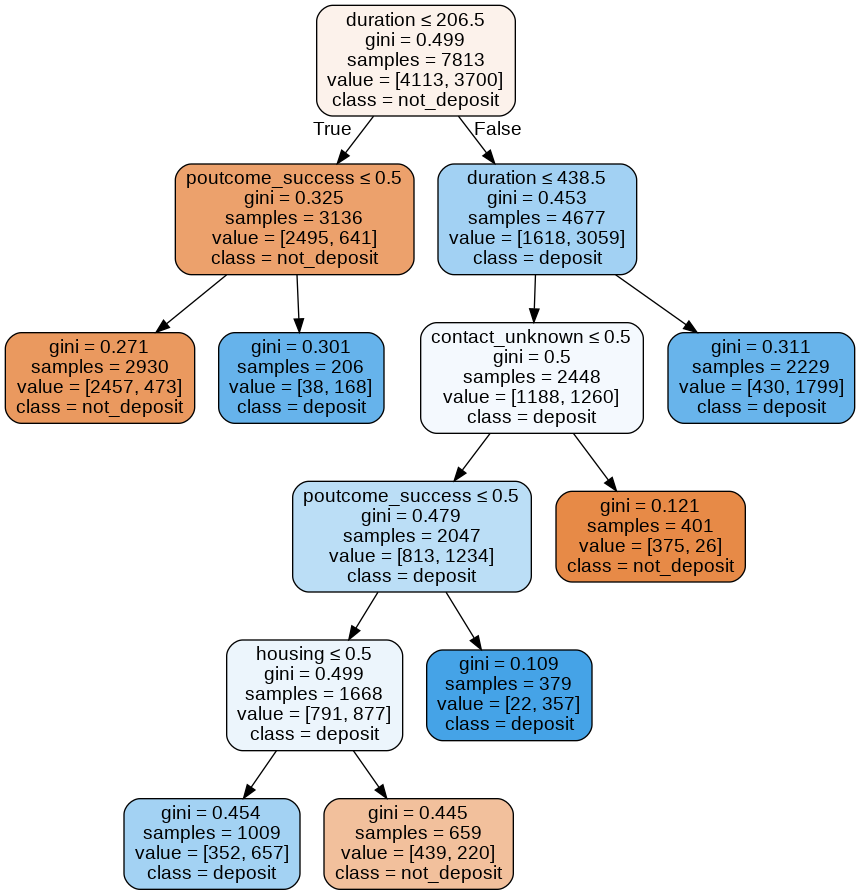

In [25]:
#Melakukan Pembuatan Tree
dot_data = StringIO()
export_graphviz(dtc, out_file = dot_data,  
                filled = True, rounded = True,
                special_characters = True,
                class_names=['not_deposit', 'deposit'],
                feature_names= ['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'education_primary',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'marital_divorced', 'marital_married', 'marital_single', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'contact_cellular', 'contact_telephone', 'contact_unknown',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep'])


graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [26]:
#melakukan print y_pred_dt sebagai Y prediksi
print(Y_pred_dt)
print('\n')

#melakukan print akurasi yang dihasilkan
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred_dt))
print('\n')

#melakukan print confusion matrix
print("Confusion Matrix :")
print(confusion_matrix(Y_test, Y_pred_dt))
print('\n')

#melakukan print Classification report
print("Classification Report")
print(classification_report(Y_test, Y_pred_dt))

[0 0 1 ... 0 1 0]


Accuracy: 0.7862048372648551


Confusion Matrix :
[[1360  400]
 [ 316 1273]]


Classification Report
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1760
           1       0.76      0.80      0.78      1589

    accuracy                           0.79      3349
   macro avg       0.79      0.79      0.79      3349
weighted avg       0.79      0.79      0.79      3349



In [27]:
#Detail hasil dari Classification Report

acc_dt = metrics.accuracy_score(Y_test, Y_pred_dt)
print("Accuracy:", acc_dt)
print('\n')

prec_dt = metrics.precision_score(Y_test, Y_pred_dt)
print("Precision:", prec_dt)
print('\n')

rec_dt = metrics.recall_score(Y_test, Y_pred_dt)
print("Recall:", rec_dt)
print('\n')

f1_dt = metrics.f1_score(Y_test, Y_pred_dt)
print("F1 Score:", f1_dt)
print('\n')

auc_dt = roc_auc_score(Y_test, Y_pred_dt)
print("ROC AUC: ", auc_dt)
print('\n')

kappa_dt = metrics.cohen_kappa_score(Y_test, Y_pred_dt)
print("Cohens Kappa Score:", kappa_dt)
print('\n')

rec_call_dt = recall_score(Y_test, Y_pred_dt, average='micro')
print("Recall score: ", rec_call_dt)

Accuracy: 0.7862048372648551


Precision: 0.7609085475194262


Recall: 0.8011327879169289


F1 Score: 0.7805027590435316


ROC AUC:  0.7869300303221008


Cohens Kappa Score: 0.5723901160630026


Recall score:  0.7862048372648551


## **Klasifikasi Menggunakan Metode SVM (Support Vector Machine)**

In [28]:
#Import svm model
from sklearn import svm

In [29]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

In [30]:
#Train the model using the training sets
clf.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred_SVM = clf.predict(X_test)

In [31]:
#melakukan print y_pred_SVM sebagai Y prediksi
print(y_pred_SVM)
print('\n')

#melakukan print akurasi yang dihasilkan
print("Accuracy:", metrics.accuracy_score(Y_test, y_pred_SVM))
print('\n')

#melakukan print confusion matrix
print("Confusion Matrix :")
print(confusion_matrix(Y_test, y_pred_SVM))
print('\n')

#melakukan print Classification report
print("Classification Report")
print(classification_report(Y_test, y_pred_SVM))

[0 0 0 ... 0 1 0]


Accuracy: 0.8321887130486713


Confusion Matrix :
[[1444  316]
 [ 246 1343]]


Classification Report
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1760
           1       0.81      0.85      0.83      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349



In [33]:
#Detail hasil dari Classification Report

acc_SVM = metrics.accuracy_score(Y_test, y_pred_SVM)
print("Accuracy:", acc_SVM)
print('\n')

prec_SVM = metrics.precision_score(Y_test, y_pred_SVM)
print("Precision:", prec_SVM)
print('\n')

rec_SVM = metrics.recall_score(Y_test, y_pred_SVM)
print("Recall:", rec_SVM)
print('\n')

f1_SVM = metrics.f1_score(Y_test, y_pred_SVM)
print("F1 Score:", f1_SVM)
print('\n')

auc_SVM = roc_auc_score(Y_test, y_pred_SVM)
print("ROC AUC: ", auc_SVM)
print('\n')

kappa_SVM = metrics.cohen_kappa_score(Y_test, y_pred_SVM)
print("Cohens Kappa Score:", kappa_SVM)
print('\n')

rec_call_SVM = recall_score(Y_test, y_pred_SVM, average='micro')
print("Recall score: ", rec_call_SVM)

Accuracy: 0.8321887130486713


Precision: 0.8095238095238095


Recall: 0.8451856513530522


F1 Score: 0.8269704433497537


ROC AUC:  0.8328200984037988


Cohens Kappa Score: 0.6642187235181303


Recall score:  0.8321887130486713


## **Perbandingan Hasil dari Setiap Metode**

### **Perbandingan Matrics Confusion**

In [40]:
print('Matrics Confusion Naive Bayes : \n', metrics.confusion_matrix(Y_test, Y_pred))
print("==============================")
print('Matrics Confusion Random Forest : \n', metrics.confusion_matrix(Y_test, Y_pred_rf))
print("==============================")
print('Matrics Confusion KNN : \n', metrics.confusion_matrix(Y_test, Y_pred_KNN))
print("==============================")
print('Matrics Confusion Decision Tree : \n', metrics.confusion_matrix(Y_test, Y_pred_dt))
print("==============================")
print('Matrics Confusion SVM : \n', metrics.confusion_matrix(Y_test, y_pred_SVM))
print("==============================")

Matrics Confusion Naive Bayes : 
 [[1536  224]
 [ 716  873]]
Matrics Confusion Random Forest : 
 [[1446  314]
 [ 183 1406]]
Matrics Confusion KNN : 
 [[1457  303]
 [ 542 1047]]
Matrics Confusion Decision Tree : 
 [[1360  400]
 [ 316 1273]]
Matrics Confusion SVM : 
 [[1444  316]
 [ 246 1343]]


### **Perbandingan Model Classification Report**

In [44]:
print('Matrics Confusion Naive Bayes : \n', metrics.classification_report(Y_test, Y_pred))
print("============================== \n")
print('Matrics Confusion Random Forest : \n', metrics.classification_report(Y_test, Y_pred_rf))
print("============================== \n")
print('Matrics Confusion KNN : \n', metrics.classification_report(Y_test, Y_pred_KNN))
print("============================== \n")
print('Matrics Confusion Decision Tree : \n', metrics.classification_report(Y_test, Y_pred_dt))
print("============================== \n")
print('Matrics Confusion SVM : \n', metrics.classification_report(Y_test, y_pred_SVM))
print("============================== \n")

Matrics Confusion Naive Bayes : 
               precision    recall  f1-score   support

           0       0.68      0.87      0.77      1760
           1       0.80      0.55      0.65      1589

    accuracy                           0.72      3349
   macro avg       0.74      0.71      0.71      3349
weighted avg       0.74      0.72      0.71      3349


Matrics Confusion Random Forest : 
               precision    recall  f1-score   support

           0       0.89      0.82      0.85      1760
           1       0.82      0.88      0.85      1589

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349


Matrics Confusion KNN : 
               precision    recall  f1-score   support

           0       0.73      0.83      0.78      1760
           1       0.78      0.66      0.71      1589

    accuracy                           0.75      3349
   macro avg       0.75      0

### **Perbandungan Accuracy, Precision, Recall, F1-Score**

In [45]:
print("Naive Bayes's Accuracy = ",acc_gnb)
print("Naive Bayes's Precision = ",prec_gnb)
print("Naive Bayes's Recall = ",rec_gnb)
print("Naive Bayes's F1-Score = ", f1_gnb)
print("\n")

print("Random Forest's Accuracy = ",acc_rf)
print("Random Forest's Precision = ",prec_rf)
print("Random Forest's Recall = ",rec_rf)
print("Random Forest's F1-Score = ", f1_rf)
print("\n")

print("KNN's Accuracy = ",acc_KNN)
print("KNN's Precision = ",prec_KNN)
print("KNN's Recall = ",rec_KNN)
print("KNN's F1-Score = ", f1_KNN)
print("\n")

print("Decision Tree's Accuracy = ",acc_dt)
print("Decision Tree's Precision = ",prec_dt)
print("Decision Tree's Recall = ",rec_dt)
print("Decision Tree's F1-Score = ", f1_dt)
print("\n")

print("SVM's Accuracy = ",acc_SVM)
print("SVMt's Precision = ",prec_SVM)
print("SVM's Recall = ",rec_SVM)
print("SVM's F1-Score = ", f1_SVM)
print("\n")

Naive Bayes's Accuracy =  0.7193191997611227
Naive Bayes's Precision =  0.7958067456700091
Naive Bayes's Recall =  0.5494021397105098
Naive Bayes's F1-Score =  0.6500372300819062


Random Forest's Accuracy =  0.8515974917885936
Random Forest's Precision =  0.8174418604651162
Random Forest's Recall =  0.8848332284455632
Random Forest's F1-Score =  0.8498035660320338


KNN's Accuracy =  0.7476858763810093
KNN's Precision =  0.7755555555555556
KNN's Recall =  0.658904971680302
KNN's F1-Score =  0.7124872405580128


Decision Tree's Accuracy =  0.7862048372648551
Decision Tree's Precision =  0.7609085475194262
Decision Tree's Recall =  0.8011327879169289
Decision Tree's F1-Score =  0.7805027590435316


SVM's Accuracy =  0.8321887130486713
SVMt's Precision =  0.8095238095238095
SVM's Recall =  0.8451856513530522
SVM's F1-Score =  0.8269704433497537




## **Kesimpulan**

Berdasarkan dari proses klasifikasi yang sudah dilakukan dengan menggunakan 5 metode algoritma yaitu Naive Bayes, Random Forest, KNN, Decision Tree, dan SVM, dapat diambil kesimpulan bahwa :

**Nilai akurasi tertinggi dihasilkan dari metode RANDOM FOREST dengan nilai:**
- Akurasi 0.8515974917885936 atau 85,2%
- Precision =  0.8174418604651162 atau 81.75%
- Recall =  0.8848332284455632 atau 88.49%
- F1-Score =  0.8498035660320338 atau 84.98%


---



**Nilai akurasi terendah dihasilkan dari metode NAIVE BAYES dengan nilai :**
- Akurasi =  0.7193191997611227 atau 71.93%
- Precision =  0.7958067456700091 atau 79.58%
- Recall =  0.5494021397105098 atau 54.94%
- F1-Score =  0.6500372300819062 atau 65.00%
